In [1]:
from IPython.display import Math,display

# Simple Linear Regression
### Question: When temperature varies, how do sales vary for an ice cream salesman?

In [3]:
display(Math('y = mx + b'))

<IPython.core.display.Math object>

### Our goal is obtain the equation (model) of our data so that we can make predictions and calculate the varying impact of changes in our dependent variable, such as temperature.
* once we have our model we can use it make predictions
* we can plan ahead

# Least Squares
* least squares is a way to find the best fit curve to a set of data points
* the sum of the squares of the residuals is used to estimate the best fit line
* least squares is used to obtain the coefficients $b $ and $m$ from $ y = mx + b$


# <center>$d = \hat{y} - y_i $</center>

* $y_i $ denotes the actual data points
* $ \hat{y}_i $ denotes the "estimated" or "fit" value of the data point

* $d$ denotes the distance from $\hat{y}_i$ to $ y$, i.e. the residual

We want to achieve `minimum (least) sum of squares`: <br>
# <center>$ min  \Sigma{(\hat{y} - y_i)}^2 $ </center>
* we square the values of the calculated residuals and sum them

### Testing and Training the Model on Our Dataset
* dataset is divided into 75% training and 25% testing
* the training data is used to train the model into understanding the data and how it varies, i.e. how the variables are related to each other
* the testing data is used to test the model. This testing data has not been seen by the model and it helps us, the humans, gauge its accuracy by then scoring the model using performance metrics

# Performing Linear Regression

# Problem Statement
You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# 1. Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Import Dataset

In [6]:
IceCream = pd.read_csv("IceCreamData.csv")

In [9]:
pd.set_option('display.max_rows', 500)
IceCream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [10]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [11]:
#view the statistics of the dataframe
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


We see that we have 500 data entries. 
* Average temp: 22.2 C
* Average Revenue: \$521.57
* Lowest temperature recorded = 0C
* Lowest amount made in 1 day = $10
* Hottest day was 45C
* most money made was \$1000

In [13]:
#check dataframe for any missing values and data types within
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


The above cell tells us we have no missing data and we are only dealing with 2 columns with a total of 500 entries. 

# 3. Visualize the Dataset

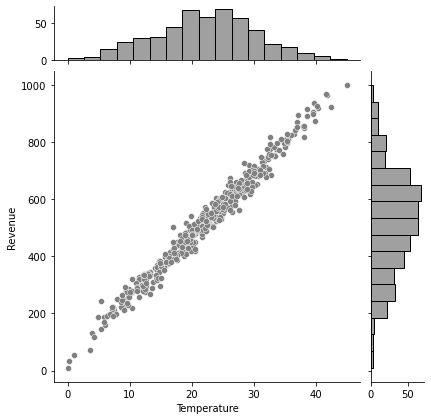

In [15]:
sns.jointplot(x='Temperature', y='Revenue', data=IceCream, color='gray')

### Why a `jointplot`?
* a jointplot allows us to see the distributions of the variables and their correlation, both on the same plot
* here we specified x as temperature and y as the revenue
    * seaborn automatically plots the distribution of these variables on their corresponding axes and their correlation on the plot
    * the distributions allow us to see how many times a certain value, such as temperature occured. 
    * from the distribution of temperature, we see that temperatures between 18C and 25C are the most common

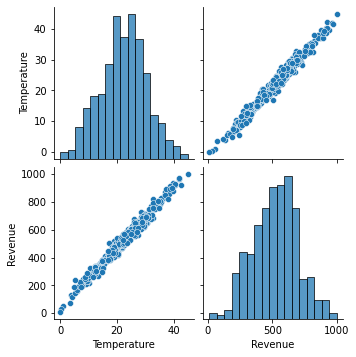

In [16]:
sns.pairplot(IceCream)

### Why a `pairplot`?
* the pairplot simply takes the jointplot and splits it into 4 separate graphs (or however many variables we give to the `pairplot` to plot)
* it gives us the same information but it is given in separate "windows"

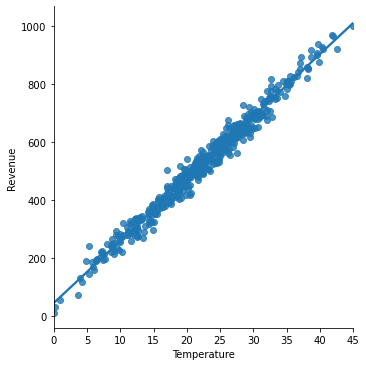

In [22]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream, palette='Blues_r')

# 4. Create Testing and Training Dataset 

In [25]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
5,14.352514
6,13.707780
7,30.833985
8,0.976870
9,31.669465


### Split the data
import the necessary libraries
`train_test_split` is the library that splits the data for us into the necessary sets into the input sizes

In [26]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
pd.set_option('display.max_rows', 10)
X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [36]:
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790101
438,17.132795


In [37]:
X_train.shape, X_test.shape, 

((400, 1), (100, 1))

In [38]:
y_train.shape

(400,)

In [39]:
y_test.shape

(100,)

# 5. Train the Model 

In [40]:
from sklearn.linear_model import LinearRegression

In [46]:
#instantiate regressor
#fit_intercept = True in order to get the m and b from y=mx+b
regressor = LinearRegression(fit_intercept = True)
#fit the regressor to the data (train the model to the data)
regressor.fit(X_train, y_train)

LinearRegression()

### From the model, obtain the m and b values of the model

In [47]:
print('Linear model coefficients (m)', regressor.coef_)
print('Linear model coefficients (b)', regressor.intercept_)

Linear model coefficients (m) [21.38197386]
Linear model coefficients (b) 46.804641277423684


# 6. Test the Model
* visualize the data from the model

By applying .predict to our regressor, we can get our predictions. 
* We are telling the regressor to use its "knowledge" and apply it to X_test values that it has not seen before and make predictions. 
* these are not exactly predictions however. What they are instead is values that the model is telling us <em>should</em> be the results based on its "knowledge" from the training set. 
* What we can do is compare the actual data we have that belongs to this X_test data to the model's "predicted" data
* so, for the model, it is a prediction, but for us, we already have the results and we are simply going to check the model's "knowledge"

In [48]:
y_predict = regressor.predict(X_test)
y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

These are the model's predicted values.
We can visually compare them to the actual values just to get a very rough idea of how well the model did by looking at the y_test values.

In [52]:
(y_test)

361    659.873287
73     623.248701
374    559.135869
155    497.752318
104    627.901841
          ...    
347    564.310532
86     643.944327
75     653.986736
438    412.082357
15     469.909033
Name: Revenue, Length: 100, dtype: float64

By merely looking at the two sets, we see that the model did a fair job of predicting, albeit not perfect. But perfect predictions are not the purpose of regression. 

### Visualize 

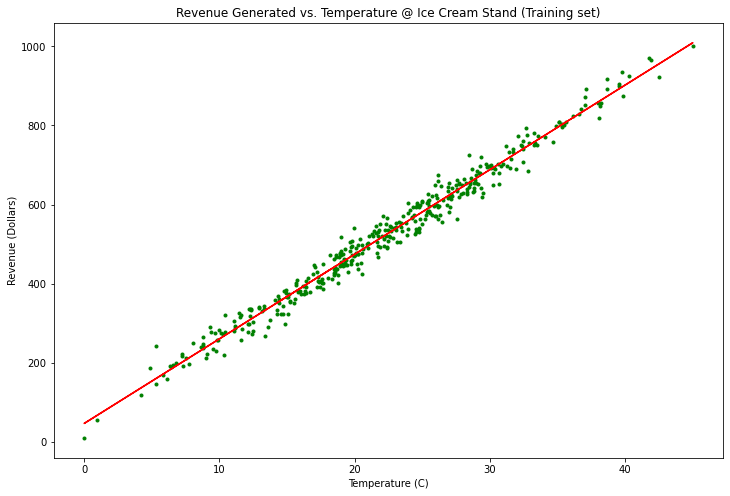

In [65]:
#plot the points from the training set
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='green', marker='.')
#plot the model on the training set
plt.plot(X_train, regressor.predict(X_train), color='red')
#add labels
plt.ylabel('Revenue (Dollars)')
plt.xlabel('Temperature (C)')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Training set)')
plt.show()

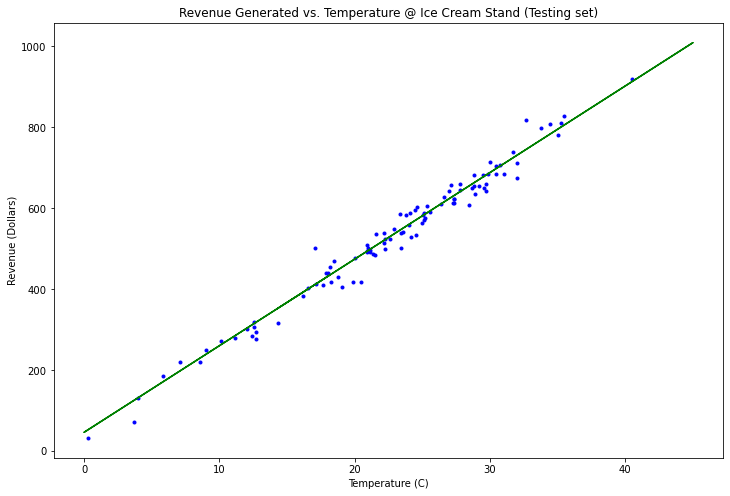

In [64]:
#plot the points from the training set
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color='blue', marker='.')
#plot the model on the training set
plt.plot(X_train, regressor.predict(X_train), color='green')
#add labels
plt.ylabel('Revenue (Dollars)')
plt.xlabel('Temperature (C)')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Testing set)')
plt.show()

### Test the model by providing it a new set of values, not in the dataset.

In [90]:
#suppose temperature = 40C
T = np.array([[40]])
T.shape
# T.reshape((1,-1))

(1, 1)

In [91]:
revenue = regressor.predict(T)

In [92]:
revenue

array([902.08359549])

In [128]:
T = np.array([[40]])


In [129]:
revenue2 = regressor.predict(T)

In [130]:
revenue2

array([902.08359549])